In [1]:
from tensorflow import keras

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('SeoulHourlyAvgAirPollution.csv')

In [6]:
df.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,201711242300,강남구,0.038,0.004,0.4,0.005,16.0,10.0
1,201711242200,강남구,0.031,0.008,0.4,0.005,17.0,9.0
2,201711242100,강남구,0.025,0.012,0.4,0.005,18.0,11.0
3,201711242000,강남구,0.033,0.007,0.4,0.005,21.0,12.0
4,201711241900,강남구,0.033,0.008,0.4,0.005,20.0,10.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 8 columns):
측정일시            4225 non-null int64
측정소명            4225 non-null object
이산화질소농도(ppm)    4187 non-null float64
오존농도(ppm)       4183 non-null float64
일산화탄소농도(ppm)    4183 non-null float64
아황산가스(ppm)      4187 non-null float64
미세먼지(㎍/㎥)       4166 non-null float64
초미세먼지(㎍/㎥)      4161 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 264.1+ KB


In [8]:
df['이산화질소농도(ppm)'].fillna(df.groupby('측정소명')['이산화질소농도(ppm)'].transform('median'), inplace = True)

In [9]:
df['오존농도(ppm)'].fillna(df.groupby('측정소명')['오존농도(ppm)'].transform('median'), inplace = True)

In [10]:
df['일산화탄소농도(ppm)'].fillna(df.groupby('측정소명')['일산화탄소농도(ppm)'].transform('median'), inplace = True)

In [11]:
df['아황산가스(ppm)'].fillna(df.groupby('측정소명')['아황산가스(ppm)'].transform('median'), inplace = True)

In [12]:
df = df.dropna()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4140 entries, 0 to 4224
Data columns (total 8 columns):
측정일시            4140 non-null int64
측정소명            4140 non-null object
이산화질소농도(ppm)    4140 non-null float64
오존농도(ppm)       4140 non-null float64
일산화탄소농도(ppm)    4140 non-null float64
아황산가스(ppm)      4140 non-null float64
미세먼지(㎍/㎥)       4140 non-null float64
초미세먼지(㎍/㎥)      4140 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 291.1+ KB


In [14]:
df2 = df.drop_duplicates('측정소명')

In [15]:
li = np.array(df2['측정소명'])

In [16]:
def ListMaptoDict(somelist):
    return {somelist[x]:x for x in range(len(li))}

local = ListMaptoDict(li)
local

{'강남구': 0,
 '강동구': 1,
 '강북구': 2,
 '강서구': 3,
 '관악구': 4,
 '광진구': 5,
 '구로구': 6,
 '금천구': 7,
 '노원구': 8,
 '도봉구': 9,
 '동대문구': 10,
 '동작구': 11,
 '마포구': 12,
 '서대문구': 13,
 '서초구': 14,
 '성동구': 15,
 '성북구': 16,
 '송파구': 17,
 '양천구': 18,
 '영등포구': 19,
 '용산구': 20,
 '은평구': 21,
 '종로구': 22,
 '중구': 23,
 '중랑구': 24}

In [17]:
df['측정소명'] = df['측정소명'].map(local)

In [18]:
df.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,201711242300,0,0.038,0.004,0.4,0.005,16.0,10.0
1,201711242200,0,0.031,0.008,0.4,0.005,17.0,9.0
2,201711242100,0,0.025,0.012,0.4,0.005,18.0,11.0
3,201711242000,0,0.033,0.007,0.4,0.005,21.0,12.0
4,201711241900,0,0.033,0.008,0.4,0.005,20.0,10.0


In [19]:
def GetYear(row):
    return int(row/100000000)
def GetMonth(row):
    return int((row % 100000000)/1000000)
def GetDay(row):
    return int((row % 1000000)/10000)
def GetHour(row):
    return int((row % 10000)/100)
def GetMinute(row):
    return int((row % 100))

df['년'] = df['측정일시'].apply(GetYear)
df['월'] = df['측정일시'].apply(GetMonth)
df['일'] = df['측정일시'].apply(GetDay)
df['시'] = df['측정일시'].apply(GetHour)
df['분'] = df['측정일시'].apply(GetMinute)

df.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),년,월,일,시,분
0,201711242300,0,0.038,0.004,0.4,0.005,16.0,10.0,2017,11,24,23,0
1,201711242200,0,0.031,0.008,0.4,0.005,17.0,9.0,2017,11,24,22,0
2,201711242100,0,0.025,0.012,0.4,0.005,18.0,11.0,2017,11,24,21,0
3,201711242000,0,0.033,0.007,0.4,0.005,21.0,12.0,2017,11,24,20,0
4,201711241900,0,0.033,0.008,0.4,0.005,20.0,10.0,2017,11,24,19,0


In [20]:
df=df.drop(['측정일시'], axis = 1)
df=df.drop(['년'], axis = 1)
df=df.drop(['월'], axis = 1)

In [21]:
df.head()

,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),일,시,분
0,0,0.038,0.004,0.4,0.005,16.0,10.0,24,23,0
1,0,0.031,0.008,0.4,0.005,17.0,9.0,24,22,0
2,0,0.025,0.012,0.4,0.005,18.0,11.0,24,21,0
3,0,0.033,0.007,0.4,0.005,21.0,12.0,24,20,0
4,0,0.033,0.008,0.4,0.005,20.0,10.0,24,19,0


In [22]:
df = df[['일', '시', '분', '측정소명', '이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)', '아황산가스(ppm)', '미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']]

In [23]:
df.head()

,일,시,분,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,24,23,0,0,0.038,0.004,0.4,0.005,16.0,10.0
1,24,22,0,0,0.031,0.008,0.4,0.005,17.0,9.0
2,24,21,0,0,0.025,0.012,0.4,0.005,18.0,11.0
3,24,20,0,0,0.033,0.007,0.4,0.005,21.0,12.0
4,24,19,0,0,0.033,0.008,0.4,0.005,20.0,10.0


In [24]:
y_data = df.iloc[:,-2:]
y_data = np.array(y_data)

x_data = df.iloc[:,:-2]
x_data = np.array(x_data)
x_data[:,0] = x_data[:,0]/30
x_data[:,1] = x_data[:,1]/24
x_data[:,2] = x_data[:,2]/60
x_data[:,3] = x_data[:,3]/25

In [70]:
model = keras.Sequential()
model.add(keras.layers.Dense(10, input_shape=(8, ), use_bias = True, kernel_initializer='normal', bias_initializer='RandomNormal'))
model.add(keras.layers.Dense(10, activation='relu', use_bias = True, kernel_initializer='normal', bias_initializer='RandomNormal'))
model.add(keras.layers.Dense(10, activation='relu', use_bias = True, kernel_initializer='normal', bias_initializer='RandomNormal'))
model.add(keras.layers.Dense(10, activation='relu', use_bias = True, kernel_initializer='normal', bias_initializer='RandomNormal'))
model.add(keras.layers.Dense(10, activation='relu', use_bias = True, kernel_initializer='normal', bias_initializer='RandomNormal'))
model.add(keras.layers.Dense(10, activation='relu', use_bias = True, kernel_initializer='normal', bias_initializer='RandomNormal'))
model.add(keras.layers.Dense(10, activation='relu', use_bias = True, kernel_initializer='normal', bias_initializer='RandomNormal'))
model.add(keras.layers.Dense(2))

opt = keras.optimizers.Adam(lr=0.02)
model.compile(optimizer = opt, loss = keras.losses.MeanSquaredError())

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_351 (Dense)            (None, 10)                90        
_________________________________________________________________
dense_352 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_353 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_354 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_355 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_356 (Dense)            (None, 10)                110       
_________________________________________________________________
dense_357 (Dense)            (None, 10)                110       
__________

In [71]:
model.fit(x_data, y_data, batch_size = 256, epochs = 1800)

Epoch 1/1800
4140/4140 [==============================] - 5s 1ms/sample - loss: 1155.9662
Epoch 2/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 430.3767
Epoch 3/1800
4140/4140 [==============================] - 0s 20us/sample - loss: 332.4159
Epoch 4/1800
4140/4140 [==============================] - 0s 20us/sample - loss: 311.6397
Epoch 5/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 300.2663
Epoch 6/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 290.7879
Epoch 7/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 282.7070
Epoch 8/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 278.8281
Epoch 9/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 277.1073
Epoch 10/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 274.1644
Epoch 11/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 276.3429
Epoch 12

4140/4140 [==============================] - 0s 16us/sample - loss: 249.4968
Epoch 92/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 238.8531
Epoch 93/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 241.0426
Epoch 94/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 238.5716
Epoch 95/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 246.8456
Epoch 96/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 241.5600
Epoch 97/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 244.1974
Epoch 98/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 241.2541
Epoch 99/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 237.1745
Epoch 100/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 237.5841
Epoch 101/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 238.9425
Epoch 102/1

4140/4140 [==============================] - 0s 18us/sample - loss: 219.4890
Epoch 181/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 225.9668
Epoch 182/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 230.4488
Epoch 183/1800
4140/4140 [==============================] - 0s 24us/sample - loss: 227.2595
Epoch 184/1800
4140/4140 [==============================] - 0s 20us/sample - loss: 220.1948
Epoch 185/1800
4140/4140 [==============================] - 0s 22us/sample - loss: 228.1975
Epoch 186/1800
4140/4140 [==============================] - 0s 25us/sample - loss: 222.5189
Epoch 187/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 219.8003
Epoch 188/1800
4140/4140 [==============================] - 0s 16us/sample - loss: 221.5675
Epoch 189/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 219.8847
Epoch 190/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 223.0669
Epo

4140/4140 [==============================] - 0s 17us/sample - loss: 195.1091
Epoch 270/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 193.4461
Epoch 271/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 199.4231
Epoch 272/1800
4140/4140 [==============================] - 0s 15us/sample - loss: 198.6269
Epoch 273/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 192.6423
Epoch 274/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 198.8056
Epoch 275/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 194.7431
Epoch 276/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 194.0695
Epoch 277/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 192.4487
Epoch 278/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 196.5731
Epoch 279/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 191.2315
Epo

4140/4140 [==============================] - 0s 16us/sample - loss: 188.9685
Epoch 359/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 189.4878
Epoch 360/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 184.2213
Epoch 361/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 181.2130
Epoch 362/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 181.5726
Epoch 363/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 177.9810
Epoch 364/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 180.2290
Epoch 365/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 187.2476
Epoch 366/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 186.3282
Epoch 367/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 183.2169
Epoch 368/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 184.0994
Epo

4140/4140 [==============================] - 0s 17us/sample - loss: 120.8661
Epoch 448/1800
4140/4140 [==============================] - 0s 24us/sample - loss: 112.1280
Epoch 449/1800
4140/4140 [==============================] - 0s 27us/sample - loss: 101.9115
Epoch 450/1800
4140/4140 [==============================] - 0s 26us/sample - loss: 104.2261
Epoch 451/1800
4140/4140 [==============================] - 0s 23us/sample - loss: 94.6293
Epoch 452/1800
4140/4140 [==============================] - 0s 21us/sample - loss: 93.2349
Epoch 453/1800
4140/4140 [==============================] - 0s 20us/sample - loss: 92.1696
Epoch 454/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 94.4019
Epoch 455/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 95.5226
Epoch 456/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 98.3144
Epoch 457/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 95.0077
Epoch 458/

4140/4140 [==============================] - 0s 17us/sample - loss: 103.1640
Epoch 537/1800
4140/4140 [==============================] - 0s 16us/sample - loss: 101.0476
Epoch 538/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 94.6166
Epoch 539/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 100.8492
Epoch 540/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 113.3415
Epoch 541/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 100.5402
Epoch 542/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 92.0565
Epoch 543/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 97.6969
Epoch 544/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 96.5794
Epoch 545/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 90.7484
Epoch 546/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 98.3086
Epoch 547

4140/4140 [==============================] - 0s 17us/sample - loss: 90.5193
Epoch 626/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 85.9397
Epoch 627/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 85.3657
Epoch 628/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 88.6578
Epoch 629/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 85.4379
Epoch 630/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 88.9989
Epoch 631/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 91.4053
Epoch 632/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 89.8303
Epoch 633/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 94.8613
Epoch 634/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 88.2368
Epoch 635/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 92.3382
Epoch 636/1800

4140/4140 [==============================] - 0s 22us/sample - loss: 199.2335
Epoch 715/1800
4140/4140 [==============================] - 0s 24us/sample - loss: 195.0566
Epoch 716/1800
4140/4140 [==============================] - 0s 22us/sample - loss: 122.1445
Epoch 717/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 94.1366
Epoch 718/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 78.3351
Epoch 719/1800
4140/4140 [==============================] - 0s 16us/sample - loss: 95.5463
Epoch 720/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 79.4713
Epoch 721/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 74.7362
Epoch 722/1800
4140/4140 [==============================] - 0s 16us/sample - loss: 70.7600
Epoch 723/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 71.5558
Epoch 724/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 72.8087
Epoch 725/1

Epoch 804/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 67.0284
Epoch 805/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 69.6761
Epoch 806/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 67.6542
Epoch 807/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 68.1360
Epoch 808/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 68.9749
Epoch 809/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 70.7845
Epoch 810/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 69.0424
Epoch 811/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 72.5075
Epoch 812/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 71.5142
Epoch 813/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 69.6812
Epoch 814/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 71.2845

4140/4140 [==============================] - 0s 18us/sample - loss: 70.9352
Epoch 894/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 67.8550
Epoch 895/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 65.5348
Epoch 896/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 66.5269
Epoch 897/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 77.6407
Epoch 898/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 69.5530
Epoch 899/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 72.9652
Epoch 900/1800
4140/4140 [==============================] - 0s 15us/sample - loss: 79.1869
Epoch 901/1800
4140/4140 [==============================] - 0s 16us/sample - loss: 73.5031
Epoch 902/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 68.4033
Epoch 903/1800
4140/4140 [==============================] - 0s 20us/sample - loss: 68.0181
Epoch 904/1800

Epoch 983/1800
4140/4140 [==============================] - 0s 16us/sample - loss: 67.0958
Epoch 984/1800
4140/4140 [==============================] - 0s 16us/sample - loss: 69.5698
Epoch 985/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 69.2978
Epoch 986/1800
4140/4140 [==============================] - 0s 16us/sample - loss: 66.2075
Epoch 987/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 67.2625
Epoch 988/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 63.8204
Epoch 989/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 66.1039
Epoch 990/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 66.8579
Epoch 991/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 69.2239
Epoch 992/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 74.6354
Epoch 993/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 67.9030

4140/4140 [==============================] - 0s 17us/sample - loss: 68.4443
Epoch 1072/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 71.9587
Epoch 1073/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 70.1318
Epoch 1074/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 67.5457
Epoch 1075/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 69.2753
Epoch 1076/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 65.4071
Epoch 1077/1800
4140/4140 [==============================] - 0s 22us/sample - loss: 64.4438
Epoch 1078/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 65.3961
Epoch 1079/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 66.8107
Epoch 1080/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 63.7657
Epoch 1081/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 63.8830
Epoc

4140/4140 [==============================] - 0s 18us/sample - loss: 62.9635
Epoch 1161/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 63.7210
Epoch 1162/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 61.9668
Epoch 1163/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 62.1251
Epoch 1164/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 63.4626
Epoch 1165/1800
4140/4140 [==============================] - 0s 16us/sample - loss: 68.4203
Epoch 1166/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 66.0915
Epoch 1167/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 61.7553
Epoch 1168/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 61.3525
Epoch 1169/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 63.8827
Epoch 1170/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 61.5562
Epoc

4140/4140 [==============================] - 0s 17us/sample - loss: 66.8858
Epoch 1250/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 68.2938
Epoch 1251/1800
4140/4140 [==============================] - 0s 20us/sample - loss: 63.0164
Epoch 1252/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 64.5562
Epoch 1253/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 64.2004
Epoch 1254/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 65.5552
Epoch 1255/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 66.2151
Epoch 1256/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 65.9748
Epoch 1257/1800
4140/4140 [==============================] - 0s 20us/sample - loss: 66.4728
Epoch 1258/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 100.5730
Epoch 1259/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 76.1001
Epo

4140/4140 [==============================] - 0s 20us/sample - loss: 66.3695
Epoch 1338/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 64.3551
Epoch 1339/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 61.2978
Epoch 1340/1800
4140/4140 [==============================] - 0s 16us/sample - loss: 62.4650
Epoch 1341/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 62.8235
Epoch 1342/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 68.7175
Epoch 1343/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 72.2722
Epoch 1344/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 66.0649
Epoch 1345/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 65.1062
Epoch 1346/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 64.5711
Epoch 1347/1800
4140/4140 [==============================] - 0s 20us/sample - loss: 63.7336
Epoc

4140/4140 [==============================] - 0s 18us/sample - loss: 75.9947
Epoch 1427/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 67.2583
Epoch 1428/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 68.0533
Epoch 1429/1800
4140/4140 [==============================] - 0s 20us/sample - loss: 74.6949
Epoch 1430/1800
4140/4140 [==============================] - 0s 16us/sample - loss: 82.7279
Epoch 1431/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 70.4752
Epoch 1432/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 65.6438
Epoch 1433/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 65.8399
Epoch 1434/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 77.2643
Epoch 1435/1800
4140/4140 [==============================] - 0s 21us/sample - loss: 77.1879
Epoch 1436/1800
4140/4140 [==============================] - 0s 22us/sample - loss: 70.7262
Epoc

4140/4140 [==============================] - 0s 21us/sample - loss: 70.7384
Epoch 1515/1800
4140/4140 [==============================] - 0s 20us/sample - loss: 67.0009
Epoch 1516/1800
4140/4140 [==============================] - 0s 21us/sample - loss: 80.3369
Epoch 1517/1800
4140/4140 [==============================] - 0s 21us/sample - loss: 81.9158
Epoch 1518/1800
4140/4140 [==============================] - 0s 21us/sample - loss: 68.5320
Epoch 1519/1800
4140/4140 [==============================] - 0s 22us/sample - loss: 67.7848
Epoch 1520/1800
4140/4140 [==============================] - 0s 21us/sample - loss: 67.8658
Epoch 1521/1800
4140/4140 [==============================] - 0s 20us/sample - loss: 82.0690
Epoch 1522/1800
4140/4140 [==============================] - 0s 21us/sample - loss: 67.1596
Epoch 1523/1800
4140/4140 [==============================] - 0s 22us/sample - loss: 68.3381
Epoch 1524/1800
4140/4140 [==============================] - 0s 20us/sample - loss: 74.3720
Epoc

4140/4140 [==============================] - 0s 19us/sample - loss: 65.2875
Epoch 1604/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 63.9485
Epoch 1605/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 67.4999
Epoch 1606/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 68.6871
Epoch 1607/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 65.8894
Epoch 1608/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 66.0732
Epoch 1609/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 66.3890
Epoch 1610/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 65.7287
Epoch 1611/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 64.2417
Epoch 1612/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 70.9084
Epoch 1613/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 64.2813
Epoc

4140/4140 [==============================] - 0s 24us/sample - loss: 65.6465
Epoch 1693/1800
4140/4140 [==============================] - 0s 22us/sample - loss: 66.9670
Epoch 1694/1800
4140/4140 [==============================] - 0s 20us/sample - loss: 62.0604
Epoch 1695/1800
4140/4140 [==============================] - 0s 22us/sample - loss: 66.0042
Epoch 1696/1800
4140/4140 [==============================] - 0s 20us/sample - loss: 65.4377
Epoch 1697/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 106.6579
Epoch 1698/1800
4140/4140 [==============================] - 0s 20us/sample - loss: 78.5985
Epoch 1699/1800
4140/4140 [==============================] - 0s 19us/sample - loss: 65.8128
Epoch 1700/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 65.0776
Epoch 1701/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 61.5558
Epoch 1702/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 61.7970
Epo

4140/4140 [==============================] - 0s 17us/sample - loss: 63.4947
Epoch 1781/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 69.6033
Epoch 1782/1800
4140/4140 [==============================] - 0s 16us/sample - loss: 65.7930
Epoch 1783/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 70.8337
Epoch 1784/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 63.7848
Epoch 1785/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 66.3731
Epoch 1786/1800
4140/4140 [==============================] - 0s 16us/sample - loss: 66.9662
Epoch 1787/1800
4140/4140 [==============================] - 0s 18us/sample - loss: 67.7596
Epoch 1788/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 65.9765
Epoch 1789/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 66.4466
Epoch 1790/1800
4140/4140 [==============================] - 0s 17us/sample - loss: 65.2008
Epoc

In [72]:
y_pred = model.predict(x_data)

In [94]:
y_pred2_0 = y_pred[1800:2000, 0]
y_pred2_1 = y_pred[1800:2000, 1]

y_data2_0 = y_data[1800:2000, 0]
y_data2_1 = y_data[1800:2000, 1]

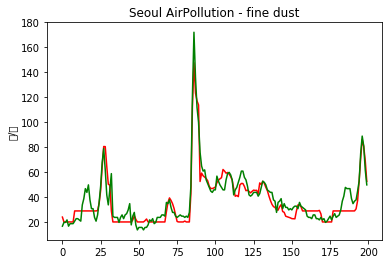

In [97]:
plt.plot(y_pred2_0, color='red')
plt.plot(y_data2_0, color='green')
plt.title('Seoul AirPollution - fine dust')
plt.ylabel('㎍/㎥')

plt.show()

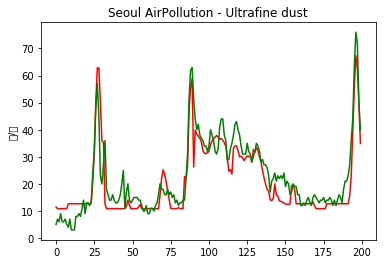

In [98]:
plt.plot(y_pred2_1, color='red')
plt.plot(y_data2_1, color='green')
plt.title('Seoul AirPollution - Ultrafine dust')
plt.ylabel('㎍/㎥')

plt.show()